In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score


In [15]:
url = "https://raw.githubusercontent.com/selva86/datasets/master/Advertising.csv"
df = pd.read_csv(url)

print("Dataset Preview:")
print(df.head())

Dataset Preview:
   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [16]:
# Features (X) and Target (y)
X = df[["TV", "radio", "newspaper"]]
y = df["sales"]   # actual sales (Y given in question)

# Split into train and test for realistic evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features (important for Ridge/Lasso)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# Define Models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}
results = {}


Linear Regression
Coefficients: [3.7642 2.7923 0.056 ]
Intercept: 14.1
Manual Predictions (first 5): [16.41 20.89 21.55 10.61 22.11]
MSE: 3.1741
R² Score: 0.8994


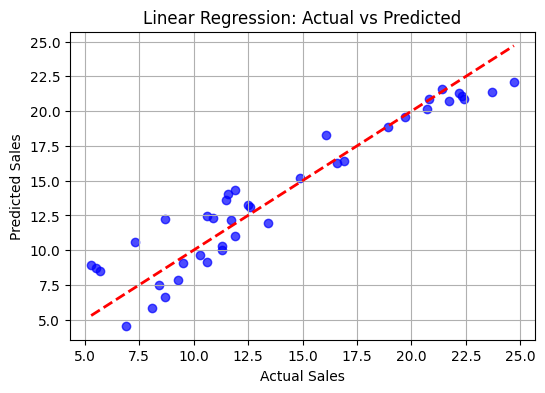


Ridge Regression
Coefficients: [3.7417 2.7733 0.0634]
Intercept: 14.1
Manual Predictions (first 5): [16.4  20.85 21.51 10.63 22.05]
MSE: 3.1942
R² Score: 0.8988


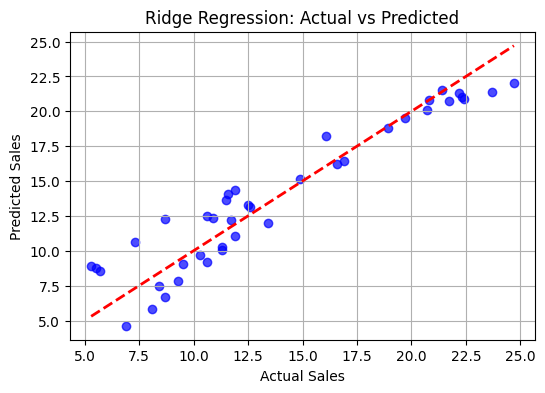


Lasso Regression
Coefficients: [3.6692 2.7191 0.    ]
Intercept: 14.1
Manual Predictions (first 5): [16.29 20.65 21.33 10.65 21.98]
MSE: 3.2089
R² Score: 0.8983


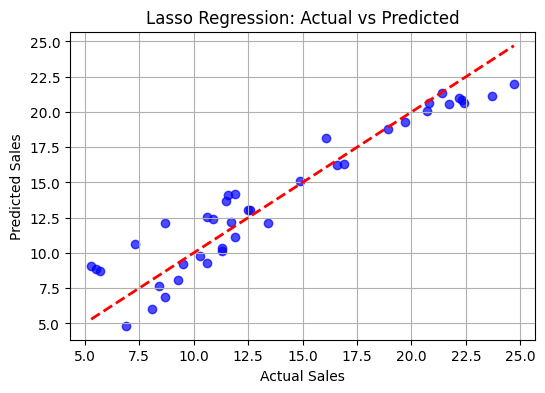

In [20]:
# -------------------------------------------
# Train, Predict, and Evaluate Each Model
# -------------------------------------------
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    # Manual prediction using regression equation
    # y = m1*x1 + m2*x2 + m3*x3 + c
    coefs = model.coef_
    intercept = model.intercept_
    y_manual = np.dot(X_test_scaled, coefs) + intercept

    # Compute Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)

    results[name] = mse

    # Print model summary
    print(f"\n{'='*50}")
    print(f"{name}")
    print(f"Coefficients: {np.round(coefs, 4)}")
    print(f"Intercept: {round(intercept, 4)}")
    print(f"Manual Predictions (first 5): {np.round(y_manual[:5], 2)}")
    print(f"MSE: {round(mse, 4)}")
    print(f"R² Score: {round(r2_score(y_test, y_pred), 4)}")

    # -------------------------------------------
    # Plot Actual vs Predicted
    # -------------------------------------------
    plt.figure(figsize=(6, 4))
    plt.scatter(y_test, y_pred, color="blue", alpha=0.7)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel("Actual Sales")
    plt.ylabel("Predicted Sales")
    plt.title(f"{name}: Actual vs Predicted")
    plt.grid(True)
    plt.show()


In [21]:
# -------------------------------------------
# Compare Mean Squared Errors
# -------------------------------------------
print("\nMean Squared Error Comparison:")
for name, mse in results.items():
    print(f"{name}: {mse:.4f}")

best_model = min(results, key=results.get)
print(f"\nBest Model (Lowest MSE): {best_model}")

# -------------------------------------------
# Summary Table
# -------------------------------------------
summary = pd.DataFrame({
    "Model": results.keys(),
    "MSE": results.values()
}).sort_values(by="MSE")

print("\nSummary Table:")
print(summary)



Mean Squared Error Comparison:
Linear Regression: 3.1741
Ridge Regression: 3.1942
Lasso Regression: 3.2089

Best Model (Lowest MSE): Linear Regression

Summary Table:
               Model       MSE
0  Linear Regression  3.174097
1   Ridge Regression  3.194156
2   Lasso Regression  3.208877
